# Naive Pipeline

Uses most basic algorithms. Defines RGB and depth images as separate 2D images, not point clouds.

In [ ]:
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors
import open3d as o3d
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
import os
from sklearn.neighbors import NearestNeighbors
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, ImageChops

## Step 1: Select Scenario and Extract Images

In [ ]:
depth_np = np.load('./depth_translation_glasses.npy')
colour_np = np.load('./colour_translated_glasses.npy')

# colour_np = np.load('colour_forward_glasses.npy')
# colour_np = np.load('colour_forward_mask.npy') # GOOD
# colour_np = np.load('colour_movement_blkglove.npy')  # GOOD use channel 2
# colour_np = np.load('colour_movement_blkglove_2.npy')  # GOOD use channel 2
# colour_np = np.load('colour_no_movement_glasses.npy')
# colour_np = np.load('colour_no_movement_glasses_orange.npy')
# colour_np = np.load('colour_no_movement_mask.npy')   # GOOD
# colour_np = np.load('colour_no_movement_mask_orange.npy')  # GOOD
# colour_np = np.load('colour_profile_mask.npy')
# colour_np = np.load('colour_scarf_glasses.npy')
# colour_np = np.load('colour_tilt_glasses.npy')
# colour_np = np.load('colour_tilt_glasses_orange.npy')
# colour_np = np.load('colour_tilt_mask.npy')    # GOOD
# colour_np = np.load('colour_tilt_mask_orange.npy')   # GOOD
# colour_np = np.load('colour_translation_glasses.npy')
# colour_np = np.load('colour_translation_glasses_orange.npy') # ok with channel 2
# colour_np = np.load('colour_translation_mask.npy')   # GOOD
# colour_np = np.load('colour_translation_mask_orange.npy')    # GOOD

# depth_np = np.load('depth_forward_mask.npy')
# depth_np = np.load('depth_movement_blkglove.npy')
# depth_np = np.load('depth_movement_blkglove_2.npy')
# depth_np = np.load('depth_no_movement_glasses.npy')
# depth_np = np.load('depth_no_movement_glasses_orange.npy')
# depth_np = np.load('depth_no_movement_mask.npy')
# depth_np = np.load('depth_no_movement_mask_orange.npy')
# depth_np = np.load('depth_profile_mask.npy')
# depth_np = np.load('depth_scarf_glasses.npy')
# depth_np = np.load('depth_tilt_glasses.npy')
# depth_np = np.load('depth_tilt_glasses_orange.npy')
# depth_np = np.load('depth_tilt_mask.npy')
# depth_np = np.load('depth_tilt_mask_orange.npy')
# depth_np = np.load('depth_translation_glasses.npy')
# depth_np = np.load('depth_translation_glasses_orange.npy')
# depth_np = np.load('depth_translation_mask.npy')
# depth_np = np.load('depth_translation_mask_orange.npy')


In [ ]:
#Complete orioginal: 22, 164
#Naiive redo, mask: 53, 245
#Naive redo, glasses: 13, 274
# colour_img1 = colour_np[53]
# colour_img2 = colour_np[245]
# depth_img1 = depth_np[53]
# depth_img2 = depth_np[245]

colour_img1 = colour_np[2]
colour_img2 = colour_np[15]
depth_img1 = depth_np[2]
depth_img2 = depth_np[15]
# # Forward glasses
# colour_img1 = colour_np[46]
# colour_img2 = colour_np[248]
# depth_img1 = depth_np[46]
# depth_img2 = depth_np[248]

# Forward mask
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[156]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[156]

# # Movement blkglove
# colour_img1 = colour_np[31]
# colour_img2 = colour_np[130]
# depth_img1 = depth_np[31]
# depth_img2 = depth_np[130]

# # Movement blkglove_2
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[174]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[174]

# # No movement glasses
# colour_img1 = colour_np[16]
# colour_img2 = colour_np[171]
# depth_img1 = depth_np[16]
# depth_img2 = depth_np[171]

# # No movement glasses orange
# colour_img1 = colour_np[31]
# colour_img2 = colour_np[193]
# depth_img1 = depth_np[31]
# depth_img2 = depth_np[193]

# # No movement mask
# colour_img1 = colour_np[9]
# colour_img2 = colour_np[191]
# depth_img1 = depth_np[9]
# depth_img2 = depth_np[191]

# # No movement mask orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[149]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[149]

# # Profile mask
# colour_img1 = colour_np[39]
# colour_img2 = colour_np[134]
# depth_img1 = depth_np[39]
# depth_img2 = depth_np[134]

# # Scarf glasses
# colour_img1 = colour_np[230]
# colour_img2 = colour_np[19]
# depth_img1 = depth_np[230]
# depth_img2 = depth_np[19]

# # Tilt glasses
# colour_img1 = colour_np[3]
# colour_img2 = colour_np[167]
# depth_img1 = depth_np[3]
# depth_img2 = depth_np[167]

# # Tilt glasses orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[184]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[184]

# # Tilt mask
# colour_img1 = colour_np[24]
# colour_img2 = colour_np[168]
# depth_img1 = depth_np[24]
# depth_img2 = depth_np[168]

# # Tilt mask orange
# colour_img1 = colour_np[20]
# colour_img2 = colour_np[167]
# depth_img1 = depth_np[20]
# depth_img2 = depth_np[167]

# # Translation glasses
# colour_img1 = colour_np[19]
# colour_img2 = colour_np[249]
# depth_img1 = depth_np[19]
# depth_img2 = depth_np[249]

# # Translation glasses orange
# colour_img1 = colour_np[4]
# colour_img2 = colour_np[184]
# depth_img1 = depth_np[4]
# depth_img2 = depth_np[184]

# # Translation mask
# colour_img1 = colour_np[6]
# colour_img2 = colour_np[297]
# depth_img1 = depth_np[6]
# depth_img2 = depth_np[297]

# # Translation mask orange
# colour_img1 = colour_np[22]
# colour_img2 = colour_np[263]
# depth_img1 = depth_np[22]
# depth_img2 = depth_np[263]



# original_height, original_width, _ = colour_img1.shape
# small_colour_img = cv2.resize(colour_img1, (160, 120))  # Smaller image size for dbscan memory requirements

### Step 1a: Visualize Images

(240, 320)


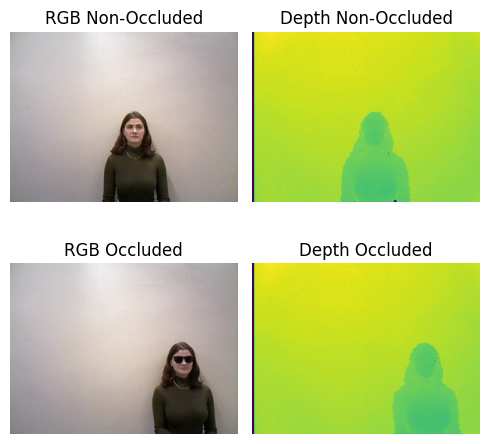

In [106]:
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.imshow(colour_img1)
plt.title("RGB Non-Occluded")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(depth_img1)
plt.title("Depth Non-Occluded")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(colour_img2)
plt.title("RGB Occluded")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(depth_img2)
plt.title("Depth Occluded")
plt.axis("off")

plt.tight_layout()
print(depth_img2.shape)

### Step 1b: Normalize + Convolve Depth Images to Remove Data Error 

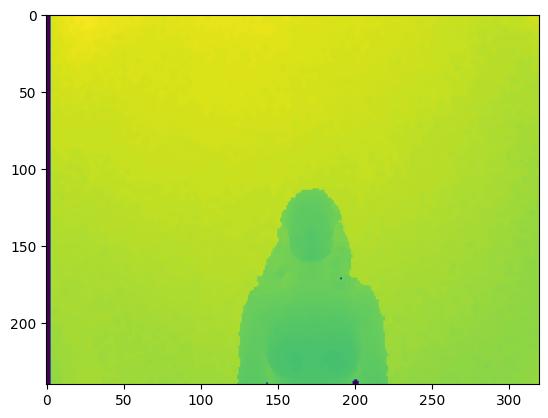

In [107]:
depth_img1_int16 = depth_img1.astype('uint16')

plt.imshow(depth_img1_int16)

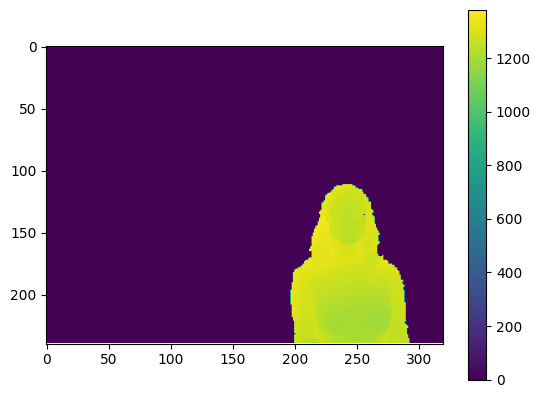

In [111]:


mask = (depth_img1 >= 1000) & (depth_img1 <= 1380)

# Set pixels outside this range to 0
depth_img1[~mask] = 0

mask = (depth_img2 >= 1000) & (depth_img2 <= 1380)

# Set pixels outside this range to 0
depth_img2[~mask] = 0

plt.imshow(depth_img2)
plt.colorbar()

##### Check which pixels are kept

Mean Depth: 143.3413671875
Number of points more than 300 outside of the average depth: 8632


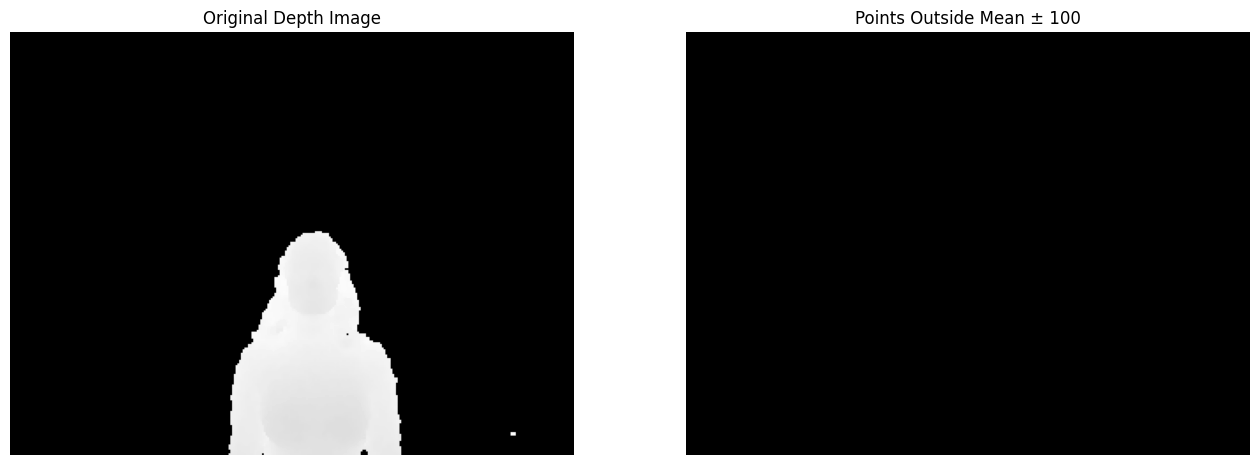

In [112]:
mean_depth = np.mean(depth_img1)

# Find the number of points outside the range (mean ± 100)
threshold = 300
outside_points = np.sum((depth_img1 < mean_depth - threshold) | (depth_img1 > mean_depth + threshold))

print(f"Mean Depth: {mean_depth}")
print(f"Number of points more than {threshold} outside of the average depth: {outside_points}")

threshold = 100

# Create a mask for points outside the range (mean ± 100)
mask = (depth_img1 < mean_depth - threshold) | (depth_img1 > mean_depth + threshold)

# Plot the original depth image
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(depth_img1, cmap='gray')
plt.title("Original Depth Image")
plt.axis("off")

# Highlight the points outside the range in a binary image
highlighted_image = np.zeros_like(depth_img1)  # Create a blank image
highlighted_image[mask] = 255  # Mark the outliers in white

plt.subplot(1, 2, 2)
plt.imshow(highlighted_image, cmap='gray')
plt.title(f"Points Outside Mean ± {threshold}")
plt.axis("off")
plt.show()


## Step 2: Get Keypoints and Corresponding Features between Images

There are a few ways to do this: we can either do it in 2D using the depth images, which is computationally faster, or in 3D using the Point Clouds. We have tried both ways below. 

### Step 2a: Get Corresponding Features in 2D

Extract keypoint coordinates and matches them

In [113]:

def getCorrespondingKeypoint2D(depth_img1, depth_img2, tolerance):
    # Convert depth images to uint8 for visualization and keypoint detection
    depth_img1_vis = cv2.normalize(depth_img1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_img2_vis = cv2.normalize(depth_img2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Detect keypoints using ORB
    orb = cv2.ORB_create()
    kp1 = orb.detect(depth_img1_vis, None)
    kp2 = orb.detect(depth_img2_vis, None)

    # Extract coordinates of keypoints
    coords1 = np.array([kp.pt for kp in kp1])  
    coords2 = np.array([kp.pt for kp in kp2])  
    # Compare coordinates to find matches
    matches = []
    distances = []
    for i, pt1 in enumerate(coords1):
        for j, pt2 in enumerate(coords2):
            if np.allclose(pt1, pt2, atol=tolerance):  # small tolerance
                matches.append((pt1, pt2))  
                distance = np.linalg.norm(pt1 - pt2)
                distances.append(distance)
    
   
       # Store matches as (x, y, depth) tuples
    img1_matches = []
    img2_matches = []
    for pt1, pt2 in matches:
        x1, y1 = int(pt1[0]), int(pt1[1])
        x2, y2 = int(pt2[0]), int(pt2[1])
        
        depth1 = depth_img1[y1, x1]  # Get depth value from original depth image
        depth2 = depth_img2[y2, x2]  # Get depth value from original depth image
        
        img1_matches.append((x1, y1, depth1))
        img2_matches.append((x2, y2, depth2))
    return img1_matches, img2_matches, distances

def visualizeKeypoints(depth_img1, depth_img2, coords1, coords2):
    depth_img1_vis = cv2.normalize(depth_img1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_img2_vis = cv2.normalize(depth_img2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

        # Plot the images with matching keypoints
    plt.figure(figsize=(10, 5))
    colours = plt.cm.jet(np.linspace(0, 1, len(coords1)))    
    # Plot depth_img1 with matching keypoints
    plt.subplot(1, 2, 1)
    plt.imshow(depth_img1_vis, cmap='gray')
    if len(coords1) > 0:
        for i, (x, y, _) in enumerate(coords1):
            plt.plot(x, y, 'o', colours[i])  # Plot keypoints in red
    plt.title("Keypoints on Depth Image 1")
    plt.axis('off')

    # Plot depth_img2 with matching keypoints
    plt.subplot(1, 2, 2)
    plt.imshow(depth_img2_vis, cmap='gray')
    if len(coords2) > 0:
        for i, (x, y, _) in enumerate(coords2):
            plt.plot(x, y, 'o', colours[i])  # Plot keypoints in red
    plt.title("Matching Keypoints on Depth Image 2")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [114]:
def matchingDepthFeatures(depth_img1, depth_img2):
    #Define window size for local region comparison (e.g., 5x5)
    window_size = 5
    half_window = window_size // 2

    # Initialize list for corresponding keypoints
    matches = []

    # Loop through each pixel in depth_img1
    for y in range(half_window, depth_img1.shape[0] - half_window):
        for x in range(half_window, depth_img1.shape[1] - half_window):
            
            # Extract depth value of the current pixel in image 1
            depth_value1 = depth_img1[y, x]
            
            # Define the search window in both images
            window1 = depth_img1[y - half_window : y + half_window + 1, x - half_window : x + half_window + 1]
            window2 = depth_img2[y - half_window : y + half_window + 1, x - half_window : x + half_window + 1]
            
            # Compute the similarity measure (e.g., Mean Squared Error) between the windows
            mse = np.sum((window1 - window2) ** 2)
            
            # Set a threshold for matching windows (you may need to adjust this threshold)
            if mse < 100:  # Example threshold for similarity, tune as necessary
                matches.append(((x, y), mse))

    # Sort matches by similarity score (lower MSE means more similar)
    matches = sorted(matches, key=lambda match: match[1])
    depth_img1_vis = cv2.normalize(depth_img1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_img2_vis = cv2.normalize(depth_img2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Plot the results
    img_matches = cv2.drawKeypoints(depth_img1_vis, [cv2.KeyPoint(m[0][0], m[0][1], 1) for m in matches], None, color=(0, 255, 0))

    plt.imshow(img_matches, cmap='gray')
    plt.title("Matched Keypoints Between Depth Images")
    plt.show()

    # Optionally, you can visualize matches as lines connecting corresponding points
    for match in matches[:10]:  # Display top 10 matches
        pt1 = match[0]  # Coordinates from depth_img1
        pt2 = match[0]  # Coordinates from depth_img2
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'ro-')  # Draw red lines between matching points
    plt.imshow(depth_img1, cmap='gray')
    plt.title("Matched Points Visualization")
    plt.show()

### Step 2b: Feature Detection

Could always add something to use the SIFT orientation/ scale to find matches (in keypoints)

In [118]:
def getSIFTFeatures(depth_img1, depth_img2):
    depth_img1 = cv2.normalize(depth_img1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_img2 = cv2.normalize(depth_img2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


    # Initialize the SIFT detector
    sift = cv2.SIFT_create(contrastThreshold=0.006, edgeThreshold=15)

    # Detect keypoints and compute descriptors for both images
    keypoints1, features1 = sift.detectAndCompute(depth_img1, None)
    keypoints2, features2 = sift.detectAndCompute(depth_img2, None)
    print("Features1 shape:", features1.shape)  # Should be a non-empty array
    print("Features2 shape:", features2.shape) 
    # FLANN-based matcher parameters
    # Use FLANN (Fast Library for Approximate Nearest Neighbors) for feature matching
    index_params = dict(algorithm=3, trees=50)  # Use a KDTree index (algorithm=0) with 10 trees
    search_params = dict(checks=200)  # Number of checks to perform (higher is more accurate but slower)

    # Perform feature matching using FLANN-based matcher
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(features1, features2, k=2)  # k=2 means finding the two best matches for each keypoint

    # Apply ratio test (Lowe's ratio test) to filter out weak matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:  # LOWER is more strict
            good_matches.append(m)

    # Draw the good matches on the images
    img_matches = cv2.drawMatches(depth_img1, keypoints1, depth_img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show the result
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.axis("off")
    return good_matches, keypoints1, keypoints2, features1, features2
    # cv2.imshow('Keypoint Matches', img_matches)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


In [119]:
def getORBFeatures(depth_img1, depth_img2):

    # Normalize depth images to the range [0, 255] and convert to uint8
    depth_img1 = cv2.normalize(depth_img1, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    depth_img2 = cv2.normalize(depth_img2, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Initialize the ORB detector
    orb = cv2.ORB_create(nfeatures=250)  # You can adjust `nfeatures` for more/less keypoints

    # Detect keypoints and compute descriptors for both images
    keypoints1, features1 = orb.detectAndCompute(depth_img1, None)
    keypoints2, features2 = orb.detectAndCompute(depth_img2, None)

    print("Features1 shape:", features1.shape if features1 is not None else "None")
    print("Features2 shape:", features2.shape if features2 is not None else "None")

    # Use BFMatcher with Hamming distance (default for ORB)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Perform feature matching
    matches = bf.match(features1, features2)

    # Sort matches by distance (lower distance is better)
    good_matches = sorted(matches, key=lambda x: x.distance)

    # Draw the good matches on the images
    img_matches = cv2.drawMatches(depth_img1, keypoints1, depth_img2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show the result
    plt.figure(figsize=(10, 5))
    plt.imshow(img_matches)
    plt.title("ORB Feature Matching")
    plt.axis("off")
    plt.show()

    return good_matches, keypoints1, keypoints2, features1, features2


##### SIFT Features (not using)

Features1 shape: (34, 128)
Features2 shape: (38, 128)


8

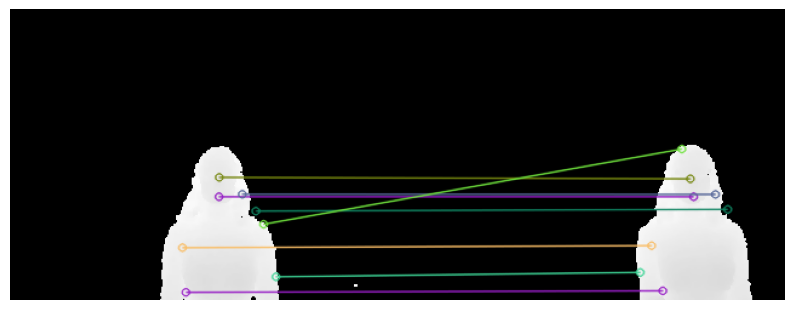

In [120]:
good_matches, keypoints1, keypoints2, features1, features2= getSIFTFeatures(depth_img1, depth_img2)
len(good_matches) #10

#### ORB Feature (using!)

Features1 shape: (153, 32)
Features2 shape: (124, 32)


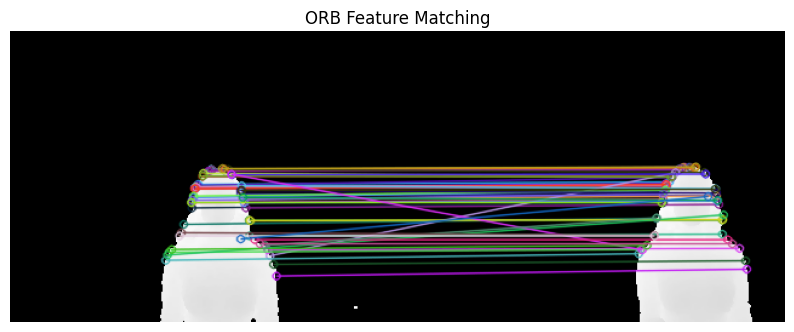

In [155]:
good_matches, keypoints1, keypoints2, features1, features2= getORBFeatures(depth_img1, depth_img2)
# print(len(good_matches)) #10

# matchingDepthFeatures(depth_img1, depth_img2)


In [156]:
distances = []
for i, match in enumerate(good_matches):
    print(f'Good Match {i+1}: QueryIdx = {match.queryIdx}, TrainIdx = {match.trainIdx}, Distance = {match.distance}')
    distances.append(match.distance)

mse = np.mean(distances)
print(mse)
good_keypoints1 = [keypoints1[m.queryIdx] for m in good_matches]
good_keypoints2 = [keypoints2[m.trainIdx] for m in good_matches]


Good Match 1: QueryIdx = 119, TrainIdx = 116, Distance = 10.0
Good Match 2: QueryIdx = 120, TrainIdx = 107, Distance = 12.0
Good Match 3: QueryIdx = 8, TrainIdx = 4, Distance = 13.0
Good Match 4: QueryIdx = 79, TrainIdx = 69, Distance = 15.0
Good Match 5: QueryIdx = 98, TrainIdx = 90, Distance = 15.0
Good Match 6: QueryIdx = 99, TrainIdx = 91, Distance = 15.0
Good Match 7: QueryIdx = 66, TrainIdx = 58, Distance = 16.0
Good Match 8: QueryIdx = 87, TrainIdx = 84, Distance = 16.0
Good Match 9: QueryIdx = 107, TrainIdx = 79, Distance = 17.0
Good Match 10: QueryIdx = 146, TrainIdx = 122, Distance = 17.0
Good Match 11: QueryIdx = 1, TrainIdx = 19, Distance = 19.0
Good Match 12: QueryIdx = 27, TrainIdx = 2, Distance = 19.0
Good Match 13: QueryIdx = 67, TrainIdx = 57, Distance = 19.0
Good Match 14: QueryIdx = 135, TrainIdx = 118, Distance = 19.0
Good Match 15: QueryIdx = 63, TrainIdx = 16, Distance = 20.0
Good Match 16: QueryIdx = 64, TrainIdx = 17, Distance = 20.0
Good Match 17: QueryIdx = 70

### Step 2c: Compute the transformation between the images

We can do this a few ways and we're not entirely sure which will work best. 
- Affine transformation 2D
- Affine transformation in 3D


In [ ]:
kps1 = []
kps2 = []

kps1 = np.array([kp.pt for kp in good_keypoints1])  
kps2 = np.array([kp.pt for kp in good_keypoints2])  


##### Affine transformation in 2D
TODO: Get some metrics to define the Affine transformation against ICP

In [ ]:

affineTransform2D = cv2.estimateAffine2D(kps1, kps2, method=cv2.RANSAC)

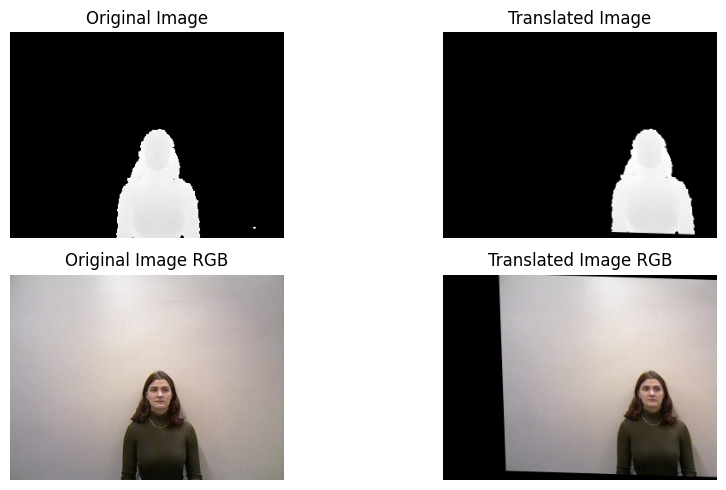

<Figure size 640x480 with 0 Axes>

In [154]:
#transformed_points = cv2.transform(np.array([kps1]), affineTransform[0])
height, width = depth_img1.shape

# Apply the affine transformation to the image using warpAffine
translated_img_depth = cv2.warpAffine(depth_img1, affineTransform2D[0], (width, height))
translated_img_colour = cv2.warpAffine(colour_img1, affineTransform2D[0], (width, height))

# Display the original and the transformed image side by side
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.imshow(depth_img1, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Plot the transformed image
plt.subplot(2, 2, 2)
plt.imshow(translated_img_depth, cmap='gray')
plt.title("Translated Image")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(colour_img1)
plt.title("Original Image RGB")
plt.axis('off')

# Plot the transformed image
plt.subplot(2, 2, 4)
plt.imshow(translated_img_colour)
plt.title("Translated Image RGB")
plt.axis('off')
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

### Step 2d: Visualize Affine Transformation

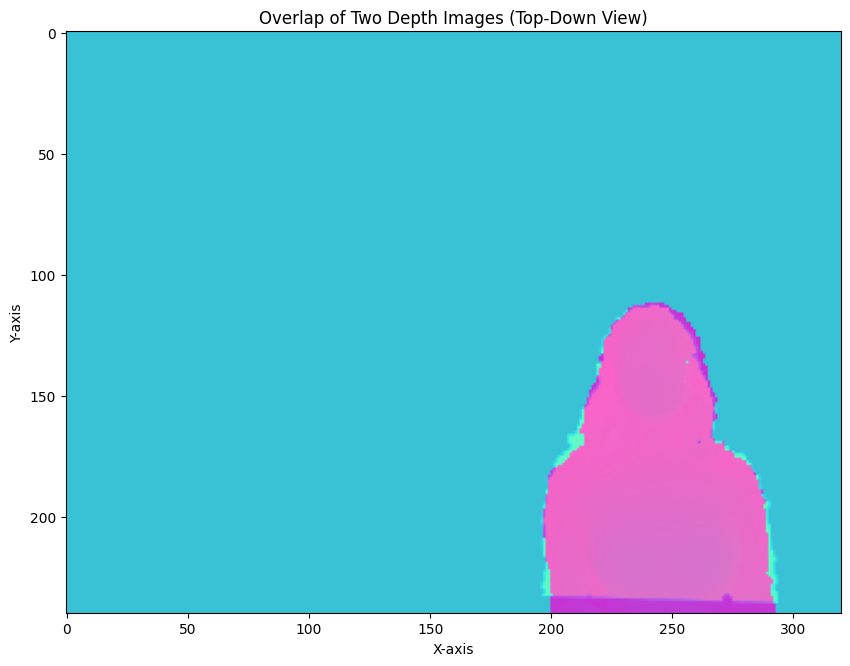

In [127]:
# Generate X, Y coordinates for the depth maps
x = np.arange(translated_img_depth.shape[1])
y = np.arange(translated_img_depth.shape[0])
x, y = np.meshgrid(x, y)

plt.figure(figsize=(10, 8))

# Plot the first depth image
plt.imshow(translated_img_depth, cmap='viridis', alpha=0.6, label="Depth Image 1")

# Overlay the second depth image
plt.imshow(depth_img2, cmap='cool', alpha=0.6, label="Depth Image 2")

# Add a colorbar

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Overlap of Two Depth Images (Top-Down View)")

plt.show()


## Step 3: Remove the Background from RGB Images + Convert to HSV

#### Remove Backgrounds

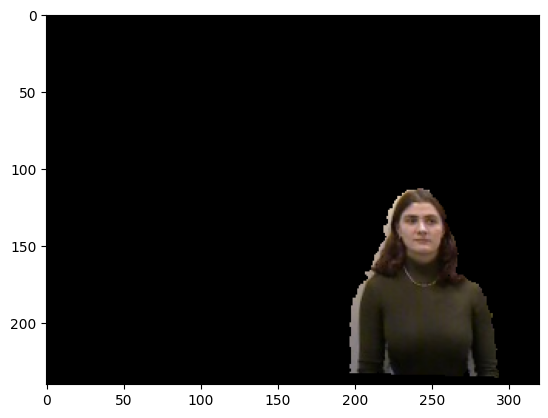

In [128]:
#Based on mins and maxs of depth image
min_depth = 1000
max_depth = 1380

# Mask the depth image
depth_mask = (translated_img_depth >= min_depth) & (translated_img_depth <= max_depth)
plt.imshow(depth_mask)

# Create a canvas with the same size as the depth image (black by default)
image1_cropped = np.zeros_like(translated_img_colour)

# Loop through the pixels of the color image and apply the depth mask
for y in range(translated_img_colour.shape[0]):
    for x in range(translated_img_colour.shape[1]):
        if depth_mask[y, x]:  # If depth is within the desired range
            image1_cropped[y, x] = translated_img_colour[y, x]  # Copy the color from the original image
        else:
            image1_cropped[y, x] = (0, 0, 0)  # Set the pixel to black if outside the range

plt.imshow(image1_cropped)

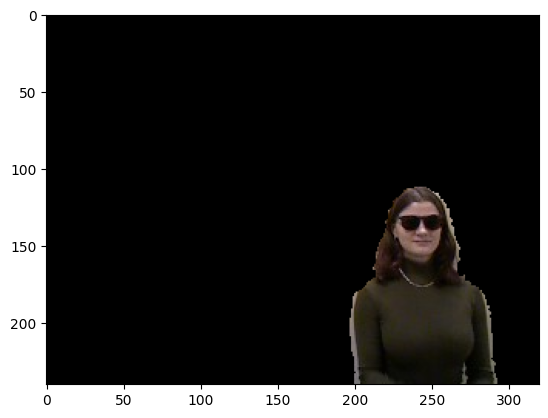

In [129]:
#Based on mins and maxs of depth image
min_depth = 1000
max_depth = 1380

# Mask the depth image
depth_mask = (depth_img2 >= min_depth) & (depth_img2 <= max_depth)

# Create a canvas with the same size as the depth image (black by default)
image2_cropped = np.zeros_like(colour_img2)

# Loop through the pixels of the color image and apply the depth mask
for y in range(colour_img2.shape[0]):
    for x in range(colour_img2.shape[1]):
        if depth_mask[y, x]:  # If depth is within the desired range
            image2_cropped[y, x] = colour_img2[y, x]  # Copy the color from the original image
        else:
            image2_cropped[y, x] = (0, 0, 0)  # Set the pixel to black if outside the range


plt.imshow(image2_cropped)


Now I need the pixels where the masked image is non-black from the original colour image;

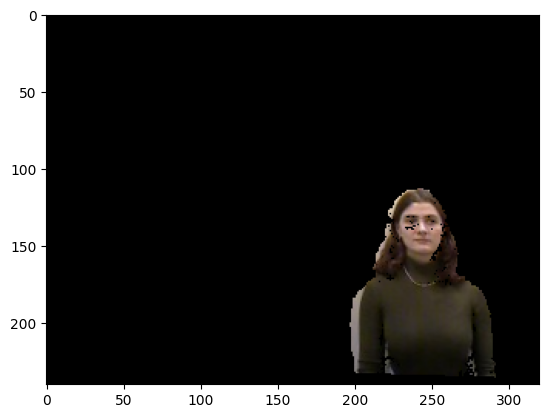

In [130]:
#Gte the pixels where neither is empty (more rigourous)
mask1 = np.all(image1_cropped != [0, 0, 0], axis=-1) 
mask2 = np.all(image2_cropped != [0, 0, 0], axis=-1)  # Non-black pixels in translated_img_colour

mask = (np.all(image1_cropped != [0, 0, 0], axis=-1)  & np.all(image2_cropped != [0, 0, 0], axis=-1) )

# Step 2: Create a copy of the canvas to overlay the image onto
h, w, channels = image1_cropped.shape
transformed_cropped = np.zeros((h, w, channels), dtype=np.uint8)

# Step 3: Use the mask to copy pixels from translated_img_colour to the canvas
transformed_cropped[mask] = translated_img_colour[mask]

# Step 4: Display the result
plt.imshow(transformed_cropped)
plt.show()

## Step 4: Get the Difference between Transformed Image and Original Second Image (RBG)

#### Get the Differences

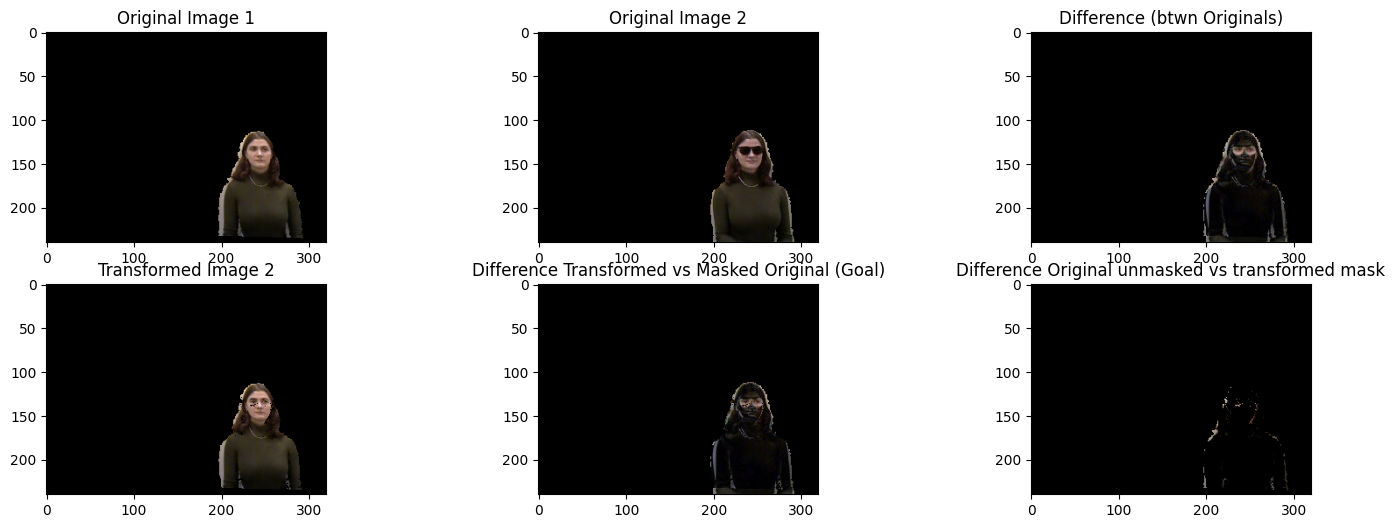

In [134]:

# convert to pillow
col_image1 = Image.fromarray(image1_cropped)
col_image2 = Image.fromarray(image2_cropped)
col_image3 = Image.fromarray(transformed_cropped)

diff_original = ImageChops.difference(col_image1, col_image2) 
diff_trans = ImageChops.difference(col_image2, col_image3) 
diff_og_trans = ImageChops.difference(col_image1, col_image3) 

diff_diff = ImageChops.difference(diff_original, diff_og_trans) 

plt.figure(figsize=(18, 6))

# Plot original image2
plt.subplot(2, 3, 1)
plt.title("Original Image 1")
plt.imshow(col_image1)

# Plot transformed image2
plt.subplot(2, 3, 2)
plt.title("Original Image 2")
plt.imshow(col_image2)

# Plot difference image
plt.subplot(2, 3, 3)
plt.title("Difference (btwn Originals)")
plt.imshow(diff_original)

plt.subplot(2, 3, 4)
plt.title("Transformed Image 2")
plt.imshow(col_image3)

plt.subplot(2, 3, 5)
plt.title("Difference Transformed vs Masked Original (Goal)")
plt.imshow(diff_trans)

plt.subplot(2, 3, 6)
plt.title("Difference Original unmasked vs transformed mask")
plt.imshow(diff_og_trans)

# Convert to grayscale (if not already)
diff_original = diff_original.convert("L")
# Convert the image to a NumPy array
diff_original_array = np.array(diff_original)
# Calculate the sum of pixel values
diff_original_array_sum = np.sum(diff_original_array)

#### Get the BRIGHTNESS channel of the DIFFERENCE image

(240, 320, 3)


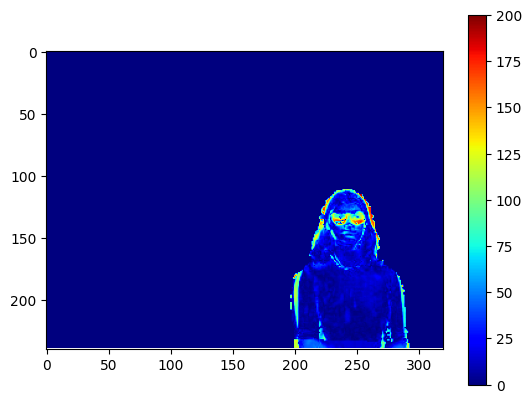

In [135]:
diff = np.array(diff_trans)

hsvImg2_diff = cv2.cvtColor(diff, cv2.COLOR_RGB2HSV)

print(hsvImg2_diff.shape)
plt.imshow(hsvImg2_diff[:,:,2], cmap='jet')
plt.colorbar()

## Step 5: K-Means Clustering

diff_trans is the difference between the transformed and the masked images

colour_image2 is the ORIGINAL masked image (RGB)


cropped_image2 is the RGB masked image without a background

hsvImg2 is the cropped (without a background) masked image, as a HSV

hsvImg2[:,:,0] is the HUE image with a max of 179
hsvImg2[:,:,1] is the Saturation channel, max 255
hsvImg2[:,:,2] is the Value channel, max 255

Need the image as a NP array

#### Plot the HSV brightness image again

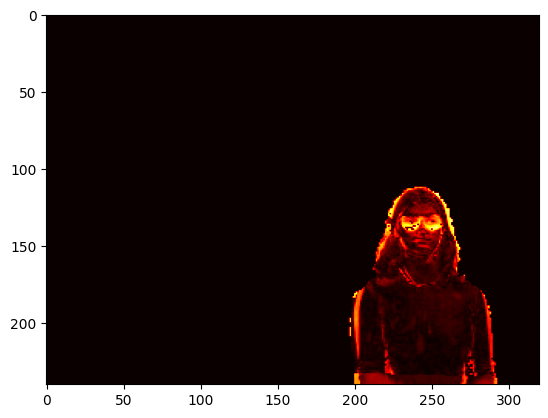

In [136]:
plt.imshow(hsvImg2_diff[:,:,2], cmap='hot')

### Step 6a: K-means Clustering

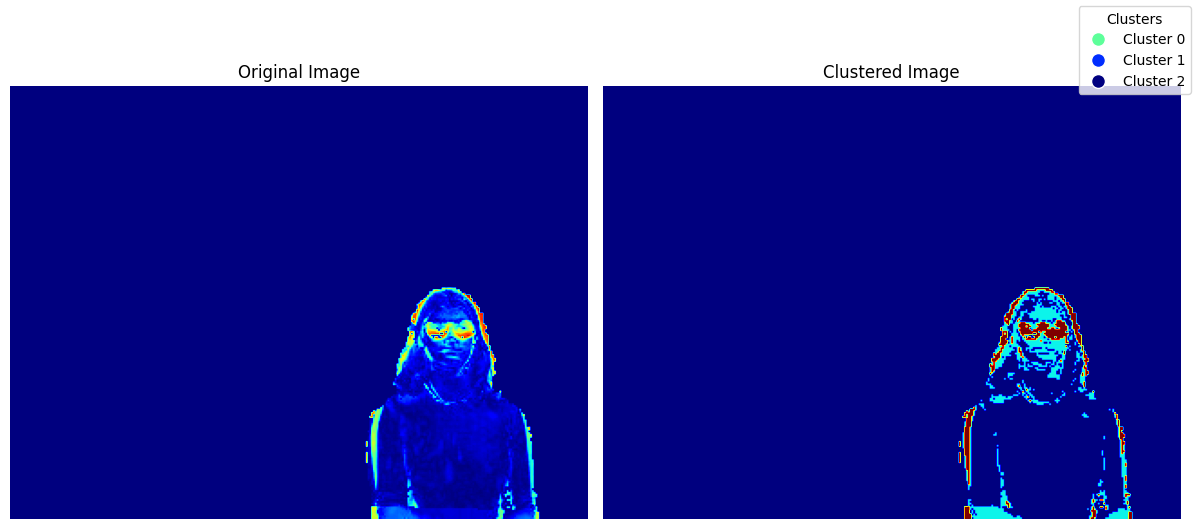

In [181]:

image = hsvImg2_diff[:,:,2]

# Reshape and convert image to float32 for k-means
Z = image.reshape((-1, 1))
Z = np.float32(Z)

# Define k-means criteria and apply k-means - iterations, then epilson
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 5)
K = 3
_, label, center = cv2.kmeans(Z, K, None, criteria, attempts=40, flags=cv2.KMEANS_RANDOM_CENTERS)

# Convert cluster centers to uint8
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((image.shape))

# Create the plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display the original and clustered images
ax[0].imshow(image, cmap='jet')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(res2, cmap='jet')
ax[1].set_title("Clustered Image")
ax[1].axis('off')

# Add a legend for the clusters
unique_clusters = np.arange(K)  # 0, 1, ..., K-1
colors = [plt.cm.jet(c / 255) for c in center.flatten()]  # Map grayscale to colors
legend_labels = [f"Cluster {i}" for i in unique_clusters]

# Create legend entries
legend_patches = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
    for color in colors
]
fig.legend(legend_patches, legend_labels, loc='upper right', title="Clusters")

plt.tight_layout()
plt.show()


##### Plot the K-Means Clustering Results

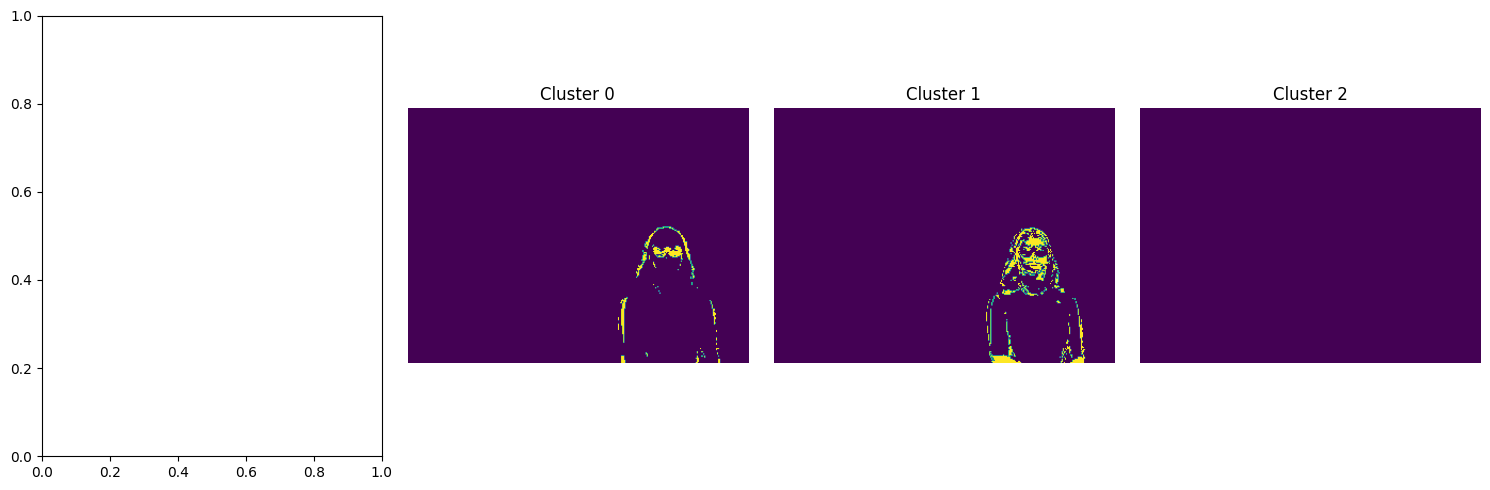

In [182]:
fig, axes = plt.subplots(1, K+1, figsize=(15, 5))


for cluster_to_plot in range(K):
    mask = (label.flatten() == cluster_to_plot).astype(np.uint8)  # Mask for current cluster
    single_cluster = mask.reshape(image.shape) * center[cluster_to_plot]  # Isolated cluster
    
    axes[cluster_to_plot + 1].imshow(single_cluster)
    axes[cluster_to_plot + 1].set_title(f"Cluster {cluster_to_plot}")
    axes[cluster_to_plot + 1].axis('off')

plt.tight_layout()
plt.show()


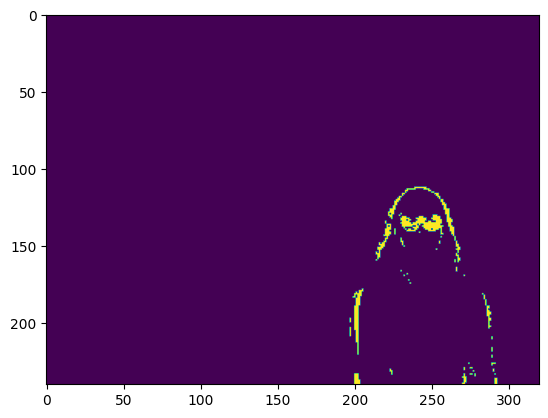

In [206]:
cluster_to_plot = 0  # Change this to the desired cluster index
mask = (label.flatten() == cluster_to_plot).astype(np.uint8)  # Create a mask for the cluster
single_cluster = mask.reshape(image.shape) * center[cluster_to_plot]  # Apply the mask

plt.imshow(single_cluster)

## Step 6: Thresholding for Masking

### Step 6a: Fill In Masked Area - Use Morphological Thresholding

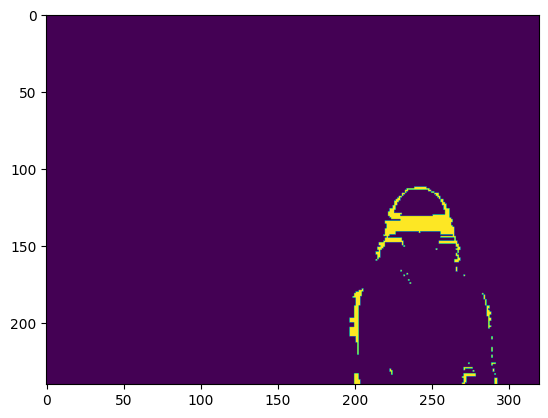

In [269]:

kernel = np.ones((1, 11), np.uint8)

closed_edges = cv2.morphologyEx(single_cluster, cv2.MORPH_CLOSE, kernel)

plt.imshow(closed_edges)

# kernel2 = np.ones((1, 11), np.uint8)

# closed_edges2 = cv2.morphologyEx(closed_edges, cv2.MORPH_CLOSE, kernel2)

# plt.imshow(closed_edges2)


### Step 6b: Denoise the Filled in Mask

### Step 6c: Perform Median Blurring on Denoised Image

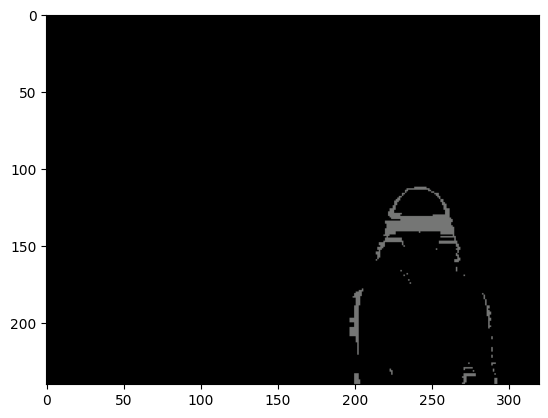

In [258]:
single_cluster_RGB = cv2.cvtColor(closed_edges, cv2.COLOR_GRAY2BGR)  # Convert grayscale to BGR
closed_edges_ary = np.array(single_cluster_RGB)  # Ensure it's in a NumPy array format
dst = cv2.fastNlMeansDenoisingColored(closed_edges_ary, None, h=1, templateWindowSize=7, searchWindowSize=21)

# Display the denoised image
plt.imshow(dst)


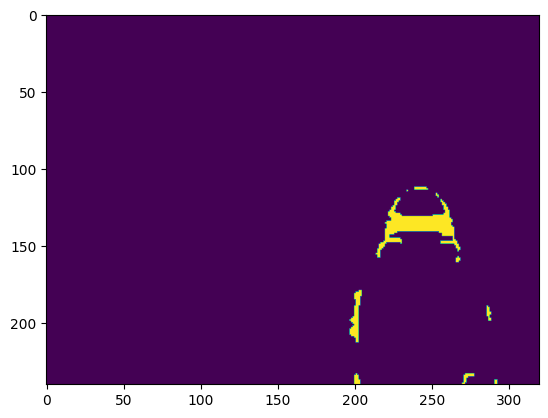

In [259]:
img_gray_blur = cv2.medianBlur(closed_edges, 3) #THIS ONE


plt.imshow(img_gray_blur)

## Step 7: Project Mask onto Occluded Image

Get the sunglasses/ occluded object

(-0.5, 319.5, 239.5, -0.5)

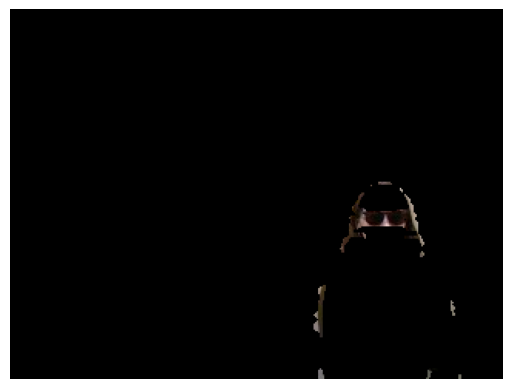

In [260]:
rbg_nonoccluded = np.array(col_image2) # Get the original image 2 to get the mask
rbg_nonoccluded[img_gray_blur == 0] = 0
plt.imshow(rbg_nonoccluded)
plt.axis('off')

Get the region from the non-occluded image

(-0.5, 319.5, 239.5, -0.5)

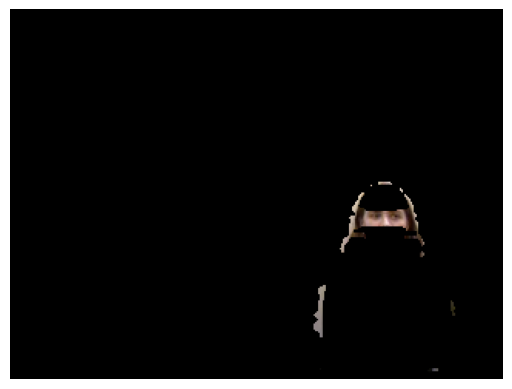

In [261]:
# get region where mask is from non-occluded image

rbg_nonoccluded = np.array(translated_img_colour) # col_image1 is the NON-OCCLUDED original image
rbg_nonoccluded[img_gray_blur == 0] = 0
plt.imshow(rbg_nonoccluded)
plt.axis('off')




(-0.5, 319.5, 239.5, -0.5)

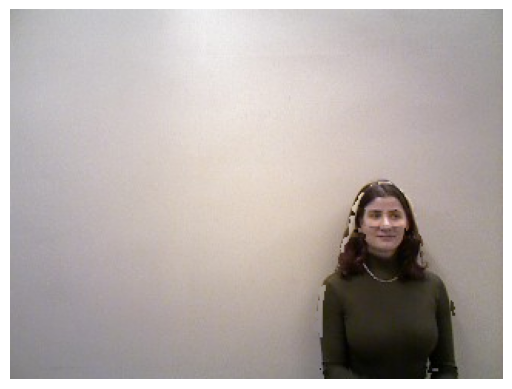

In [262]:
# place the above region on the occluded image

face_seg = rbg_nonoccluded 
mask = np.any(face_seg > 0, axis=-1)
# rbg_mask = np.array(col_image2) # col_image3 is the occluded image!!

rbg_mask = np.array(colour_img2) # col_image3 is the occluded image!!

rbg_mask[mask] = face_seg[mask] # 

plt.imshow(rbg_mask)
plt.axis('off')
